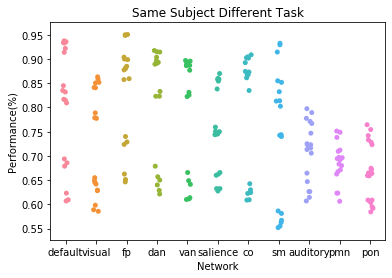

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
#SS
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
outDir= thisDir + 'output/subNetwork/'
netList=['default', 'visual','fp','dan','van','salience','co','sm','auditory','pmn','pon']
netRoi=dict([('default', 13653),('visual',12987),('fp', 7992),('dan',10656),('van',7659),('salience', 1332),('co', 13320),('sm', 12654),('sm-lat', 2664),('auditory', 7992),('pmn',1665),('pon',2331)])
df=pd.DataFrame()
for i in netList:
    SVC=pd.read_csv(outDir+i+'/results/SVC/acc/SS/stats.csv', usecols=[1, 2, 3])
    SVC['Analysis']='SVC'
    SVC['Network']=i
    SVC['Features']=netRoi[i]
    #SVC['Train.Test']=SVC['train_task']+'.'+SVC['test_task']
    #SVC.drop(columns=['train_task', 'test_task'], inplace=True)
    log=pd.read_csv(outDir+i+'/results/logReg/acc/SS/stats.csv', usecols=[1, 2, 3])
    log['Analysis']='log'
    log['Network']=i
    log['Features']=netRoi[i]
    #log['Train.Test']=log['train_task']+'.'+log['test_task']
    #log.drop(columns=['train_task', 'test_task'], inplace=True)
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/SS/stats.csv', usecols=[1, 2, 3])
    ridge['Analysis']='ridge'
    ridge['Network']=i
    ridge['Features']=netRoi[i]
    #ridge['Train.Test']=ridge['train_task']+'.'+ridge['test_task']
    #ridge.drop(columns=['train_task', 'test_task'], inplace=True)
    classifiers=[SVC, log, ridge]
    sub_df = pd.concat(classifiers)
    df=pd.concat([df,sub_df])


ax = sns.stripplot(x="Network", y="Mean",data=df)
ax.set_title('Same Subject Different Task')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'SS.png', bbox_inches='tight')

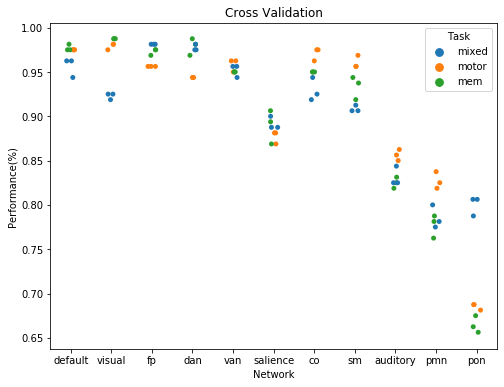

In [114]:
#CV
CV=pd.DataFrame()
for i in netList:
    SVC=pd.read_csv(outDir+i+'/results/SVC/acc/CV/stats.csv')
    SVC['Analysis']='SVC'
    SVC['Network']=i
    SVC['Features']=netRoi[i]
    log=pd.read_csv(outDir+i+'/results/logReg/acc/CV/stats.csv')
    log['Analysis']='log'
    log['Network']=i
    log['Features']=netRoi[i]
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/CV/stats.csv')
    ridge['Analysis']='ridge'
    ridge['Network']=i
    ridge['Features']=netRoi[i]
    classifiers=[SVC, log, ridge]
    sub_df = pd.concat(classifiers)
    CV=pd.concat([CV,sub_df])

CV.rename(columns={"Unnamed: 0": "Task"}, inplace=True)

plt.figure(figsize=(8,6))
ax = sns.stripplot(x="Network", y="Mean",hue='Task',data=CV)
ax.set_title('Cross Validation')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'CV_task.png', bbox_inches='tight')

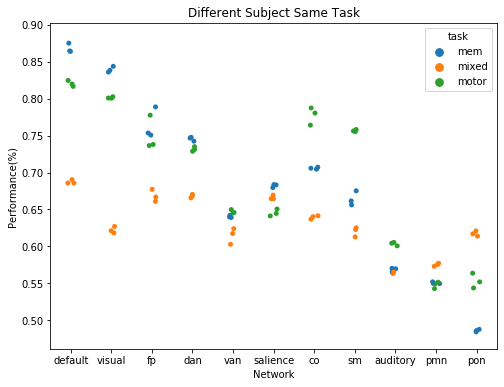

In [119]:
#DS
DS=pd.DataFrame()
for i in netList:
    SVC=pd.read_csv(outDir+i+'/results/SVC/acc/DS/stats.csv')
    SVC['Analysis']='SVC'
    SVC['Network']=i
    SVC['Features']=netRoi[i]
    log=pd.read_csv(outDir+i+'/results/logReg/acc/DS/stats.csv')
    log['Analysis']='log'
    log['Network']=i
    log['Features']=netRoi[i]
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/DS/stats.csv')
    ridge['Analysis']='ridge'
    ridge['Network']=i
    ridge['Features']=netRoi[i]
    classifiers=[SVC, log, ridge]
    sub_df = pd.concat(classifiers)
    DS=pd.concat([DS,sub_df])

plt.figure(figsize=(8,6))
ax = sns.stripplot(x="Network", y="Mean",hue="task",data=DS)
ax.set_title('Different Subject Same Task')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'DS_task.png', bbox_inches='tight')

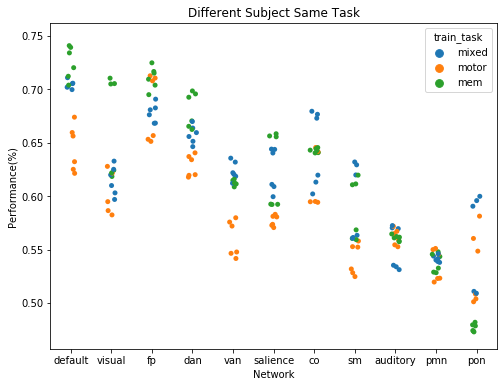

In [129]:
#BS
BS=pd.DataFrame()
for i in netList:
    SVC=pd.read_csv(outDir+i+'/results/SVC/acc/BS/stats.csv')
    SVC['Analysis']='SVC'
    SVC['Network']=i
    SVC['Features']=netRoi[i]
    log=pd.read_csv(outDir+i+'/results/logReg/acc/BS/stats.csv')
    log['Analysis']='log'
    log['Network']=i
    log['Features']=netRoi[i]
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/BS/stats.csv')
    ridge['Analysis']='ridge'
    ridge['Network']=i
    ridge['Features']=netRoi[i]
    classifiers=[SVC, log, ridge]
    sub_df = pd.concat(classifiers)
    BS=pd.concat([BS,sub_df])
BS.drop(['Unnamed: 0'], axis=1, inplace=True)

plt.figure(figsize=(8,6))
ax = sns.stripplot(x="Network", y="Mean",hue="train_task",data=BS)
ax.set_title('Different Subject Same Task')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'BS_task.png', bbox_inches='tight')

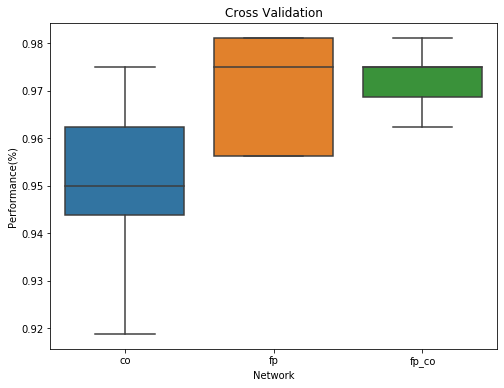

In [140]:
CV=pd.DataFrame()
subList=['co', 'fp', 'fp_co']
for i in subList: 
    SVC=pd.read_csv(outDir+i+'/results/SVC/acc/CV/stats.csv')
    SVC['Analysis']='SVC'
    SVC['Network']=i
    #SVC['Features']=netRoi[i]
    log=pd.read_csv(outDir+i+'/results/logReg/acc/CV/stats.csv')
    log['Analysis']='log'
    log['Network']=i
    #log['Features']=netRoi[i]
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/CV/stats.csv')
    ridge['Analysis']='ridge'
    ridge['Network']=i
    #ridge['Features']=netRoi[i]
    classifiers=[SVC, log, ridge]
    sub_df = pd.concat(classifiers)
    CV=pd.concat([CV,sub_df])
CV.rename(columns={"Unnamed: 0": "Task"}, inplace=True)

plt.figure(figsize=(8,6))
ax = sns.boxplot(x="Network", y="Mean",data=CV)
ax.set_title('Cross Validation')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'CV_fpCO.png', bbox_inches='tight')

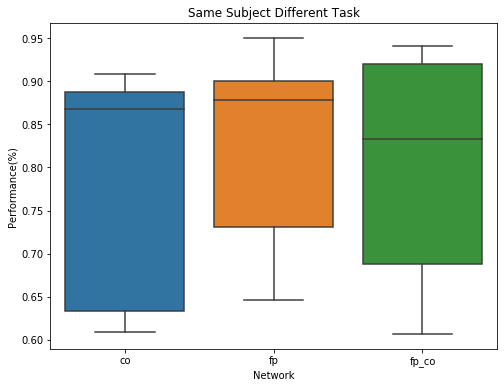

In [147]:
#SS
SS=pd.DataFrame()
for i in subList:
    SVC=pd.read_csv(outDir+i+'/results/SVC/acc/SS/stats.csv', usecols=[1, 2, 3])
    SVC['Analysis']='SVC'
    SVC['Network']=i
    #SVC['Features']=netRoi[i]
    #SVC['Train.Test']=SVC['train_task']+'.'+SVC['test_task']
    #SVC.drop(columns=['train_task', 'test_task'], inplace=True)
    log=pd.read_csv(outDir+i+'/results/logReg/acc/SS/stats.csv', usecols=[1, 2, 3])
    log['Analysis']='log'
    log['Network']=i
    #log['Features']=netRoi[i]
    #log['Train.Test']=log['train_task']+'.'+log['test_task']
    #log.drop(columns=['train_task', 'test_task'], inplace=True)
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/SS/stats.csv', usecols=[1, 2, 3])
    ridge['Analysis']='ridge'
    ridge['Network']=i
    #ridge['Features']=netRoi[i]
    #ridge['Train.Test']=ridge['train_task']+'.'+ridge['test_task']
    #ridge.drop(columns=['train_task', 'test_task'], inplace=True)
    classifiers=[SVC, log, ridge]
    sub_df = pd.concat(classifiers)
    SS=pd.concat([SS,sub_df])

plt.figure(figsize=(8,6))
ax = sns.boxplot(x="Network", y="Mean",data=SS)
ax.set_title('Same Subject Different Task')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'SS_fpCO.png', bbox_inches='tight')

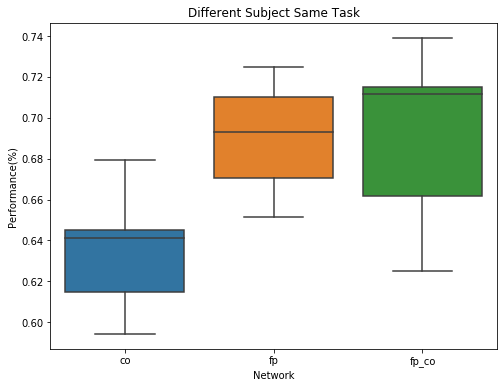

In [151]:
#BS
BS=pd.DataFrame()
for i in subList:
    SVC=pd.read_csv(outDir+i+'/results/SVC/acc/BS/stats.csv')
    SVC['Analysis']='SVC'
    SVC['Network']=i
    #SVC['Features']=netRoi[i]
    log=pd.read_csv(outDir+i+'/results/logReg/acc/BS/stats.csv')
    log['Analysis']='log'
    log['Network']=i
    #log['Features']=netRoi[i]
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/BS/stats.csv')
    ridge['Analysis']='ridge'
    ridge['Network']=i
    #ridge['Features']=netRoi[i]
    classifiers=[SVC, log, ridge]
    sub_df = pd.concat(classifiers)
    BS=pd.concat([BS,sub_df])
BS.drop(['Unnamed: 0'], axis=1, inplace=True)

plt.figure(figsize=(8,6))
ax = sns.boxplot(x="Network", y="Mean",data=BS)
ax.set_title('Different Subject Same Task')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'BS_fpCO.png', bbox_inches='tight')

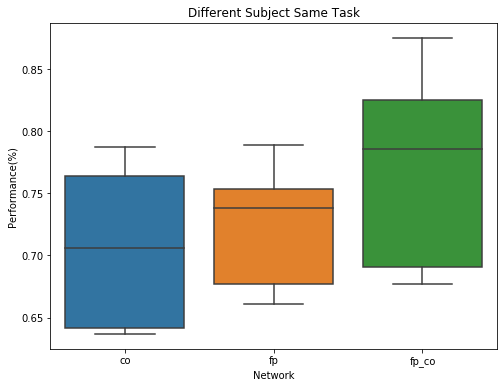

In [157]:
#DS
DS=pd.DataFrame()
for i in subList:
    SVC=pd.read_csv(outDir+i+'/results/SVC/acc/DS/stats.csv')
    SVC['Analysis']='SVC'
    SVC['Network']=i
    #SVC['Features']=netRoi[i]
    log=pd.read_csv(outDir+i+'/results/logReg/acc/DS/stats.csv')
    log['Analysis']='log'
    log['Network']=i
    #log['Features']=netRoi[i]
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/DS/stats.csv')
    ridge['Analysis']='ridge'
    ridge['Network']=i
    #ridge['Features']=netRoi[i]
    classifiers=[SVC, log, ridge]
    sub_df = pd.concat(classifiers)
    DS=pd.concat([DS,sub_df])

plt.figure(figsize=(8,6))
ax = sns.boxplot(x="Network", y="Mean",data=DS)
ax.set_title('Different Subject Same Task')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'DS_fpCO.png', bbox_inches='tight')

In [190]:
#Ridge only 
#CV
R_CV=pd.DataFrame()
for i in netList:
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/CV/stats.csv')
    ridge['Network']=i
    ridge['Features']=netRoi[i]
    R_CV=pd.concat([R_CV,ridge])
R_CV.rename(columns={"Unnamed: 0": "Task"}, inplace=True)

#SS
R_SS=pd.DataFrame()
for i in netList:
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/SS/stats.csv', usecols=[1, 2, 3])
    ridge['Network']=i
    ridge['Features']=netRoi[i]
    R_SS=pd.concat([R_SS,ridge])

#DS
R_DS=pd.DataFrame()
for i in netList:
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/DS/stats.csv')
    ridge['Network']=i
    ridge['Features']=netRoi[i]
    R_DS=pd.concat([R_DS,ridge])
    
#BS
R_BS=pd.DataFrame()
for i in netList:
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/BS/stats.csv', usecols=[1, 2, 3,4])
    ridge['Network']=i
    ridge['Features']=netRoi[i]
    R_BS=pd.concat([R_BS,ridge])
    

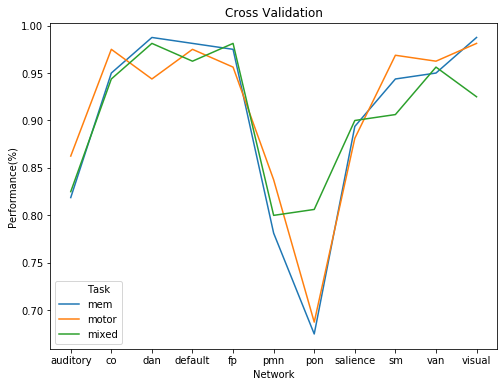

In [215]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x="Network", y="Mean",hue='Task',hue_order=['mem','motor','mixed'],data=R_CV)
ax.set_title('Cross Validation')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'CV_Ridge.png', bbox_inches='tight')

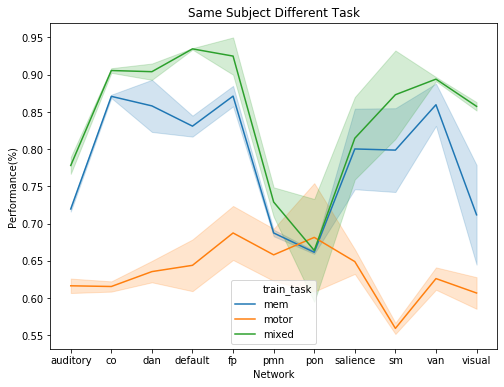

In [216]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x="Network", y="Mean",hue="train_task",hue_order=['mem','motor','mixed'],data=R_SS)
ax.set_title('Same Subject Different Task')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'SS_Ridge.png', bbox_inches='tight')

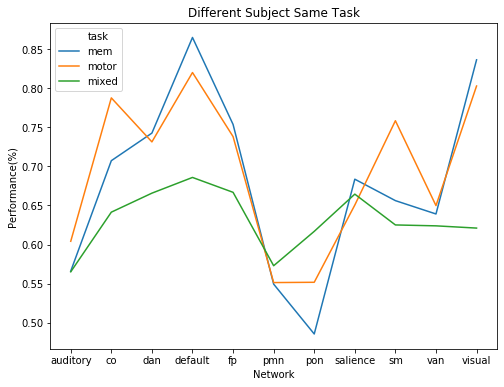

In [217]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x="Network", y="Mean",hue="task", hue_order=['mem','motor','mixed'],data=R_DS)
ax.set_title('Different Subject Same Task')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'DS_Ridge.png', bbox_inches='tight')

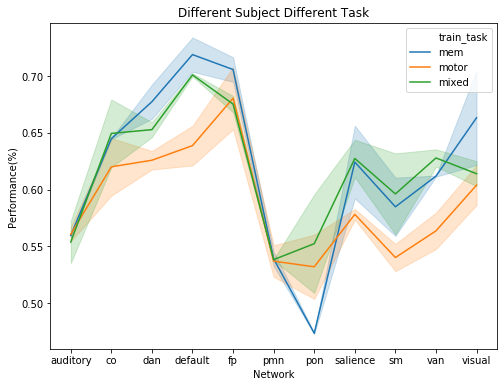

In [224]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x="Network", y="Mean",hue="train_task",hue_order=['mem','motor','mixed'],data=R_BS)
ax.set_title('Different Subject Different Task')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'BS_Ridge.png', bbox_inches='tight')

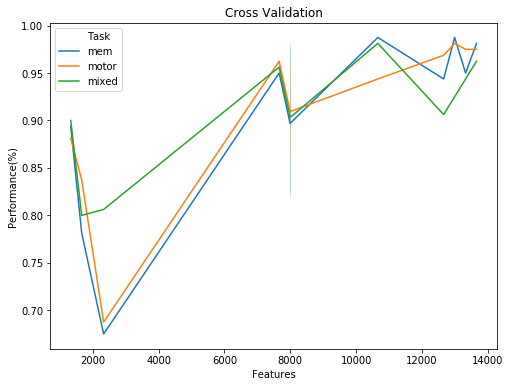

In [219]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x="Features", y="Mean",hue='Task',hue_order=['mem','motor','mixed'],data=R_CV)
ax.set_title('Cross Validation')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'CV_feat.png', bbox_inches='tight')

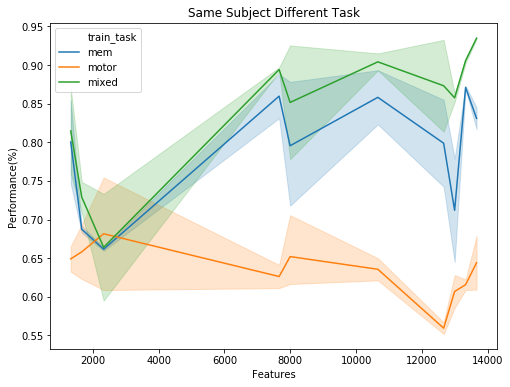

In [220]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x="Features", y="Mean",hue="train_task",hue_order=['mem','motor','mixed'],data=R_SS)
ax.set_title('Same Subject Different Task')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'SS_feat.png', bbox_inches='tight')

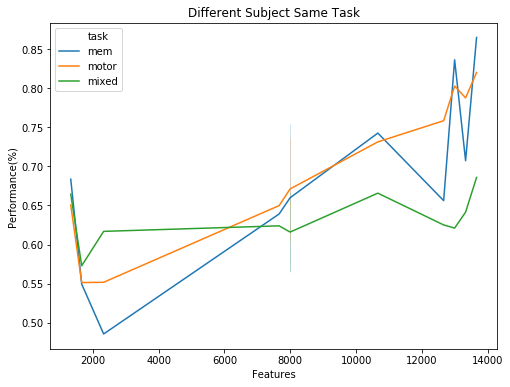

In [222]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x="Features", y="Mean",hue="task", hue_order=['mem','motor','mixed'],data=R_DS)
ax.set_title('Different Subject Same Task')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'DS_feat.png', bbox_inches='tight')

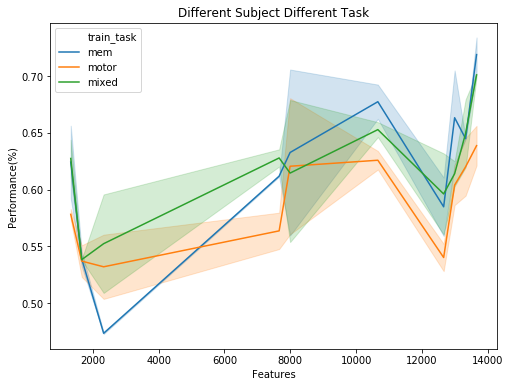

In [225]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x="Features", y="Mean",hue="train_task",hue_order=['mem','motor','mixed'],data=R_BS)
ax.set_title('Different Subject Different Task')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'BS_feat.png', bbox_inches='tight')